<a href="https://colab.research.google.com/github/MCV-Jimenez/Food-sales-predictions/blob/main/Project_1_Part_5_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Food Sales Predictions**

Marco Jimenez

2/27/2022

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sales_predictions = '/content/sales_predictions.csv'
df_sales = pd.read_csv(sales_predictions)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Inspection and Cleaning

In [79]:
# Identifying the number of rows and columns
rows = df_sales.shape[0]
cols = df_sales.shape[1]
# Displaying the number of rows and columns
print("Rows:" + str(rows))
print("Columns:" + str(cols))

Rows:8523
Columns:12


In [80]:
# Identifying data types
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [81]:
# Checking for duplicate rows & columns
df_sales.duplicated().sum()

0

In [82]:
# Identifying missing values
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Negotiating Null Values**

Filling in the missing values in the Item Weight column by mean. I refered to a link posted by Mandy in the discord and used the structure of the code she suggested. 

From what I understand it's grouping the missing weight values by their respective Item Identifiers & filling in the missing values with the average item weight of their group

In [83]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(df_sales.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
# For some reason there are still four missing values but I was unbale to determine why or how to fill them in even with the fillna method
df_sales['Item_Weight'].isnull().sum()

4

Filled the NaN values in the Outlet Size column with "missing" because dropping those rows would remove too much important information, and there was no way to group it with another column in a way that made sense relative to the size of any given store.

In [84]:
df_sales['Outlet_Size'] = df_sales[['Outlet_Size']].fillna("missing")
df_sales['Outlet_Size'] 

0        Medium
1        Medium
2        Medium
3       missing
4          High
         ...   
8518       High
8519    missing
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [85]:
# Confirming that there are no more missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Fixing Inconsistent Categories**

In [86]:
# Identifying how many unique values are in each column
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   446
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [87]:
# Looking at insconsistencies in the Item Fat Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [88]:
# Creating a dictionary of the values I want to replace and what I want to replace them with
replace_fat = {'reg':"Regular",'low fat':"Low Fat", 'LF':"Low Fat"}

The Item Fat Content column should only have the 2 values 'Low Fat' or 'Regular'.

In [114]:
# When all cells are run (F9) all the values in this cell print out a long list, 
#but when this cell is run individually it will print just the value counts of the column

# Filtering the unique values in the fat content column
Item_Fat_Content = df_sales['Item_Fat_Content'].unique()
# Creating a for loop function for the column to replace the incorrect values with the correct values
for Item_Fat_Content in df_sales.Item_Fat_Content:     
    if Item_Fat_Content == "reg":
        print("Regular")
    elif Item_Fat_Content == "low fat":
        print("Low Fat")
    elif Item_Fat_Content == 'LF':
        print("Low Fat")
        continue
        print(Item_Fat_Content).head()
# Applying the for loop function and confirming desired result
df_sales.Item_Fat_Content = df_sales.Item_Fat_Content.replace(replace_fat)
df_sales.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [90]:
# Selecting only the numerical columns
mmm_df = df_sales.describe(include=[np.number])
mmm_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [91]:
# Displaying the min of each numerical column 
mmm_df.min()

Item_Weight                   4.55500
Item_Visibility               0.00000
Item_MRP                     31.29000
Outlet_Establishment_Year     8.37176
Item_Outlet_Sales            33.29000
dtype: float64

In [92]:
# Displaying the max of each numerical column
mmm_df.max()

Item_Weight                   8519.0000
Item_Visibility               8523.0000
Item_MRP                      8523.0000
Outlet_Establishment_Year     8523.0000
Item_Outlet_Sales            13086.9648
dtype: float64

In [93]:
# Dispplaying the mean of each numerical column
mmm_df.mean()

Item_Weight                  1075.088940
Item_Visibility              1065.452703
Item_MRP                     1180.866156
Outlet_Establishment_Year    2564.150453
Item_Outlet_Sales            3907.614766
dtype: float64

# Explanatory Visualizations

I made a histogram with multiple variables so that I can briefly analyze more than one column of data at a time and futher inspect if needed. In this case I want to futher analyze the Item Outlet Sales column.

Code adapted from source: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

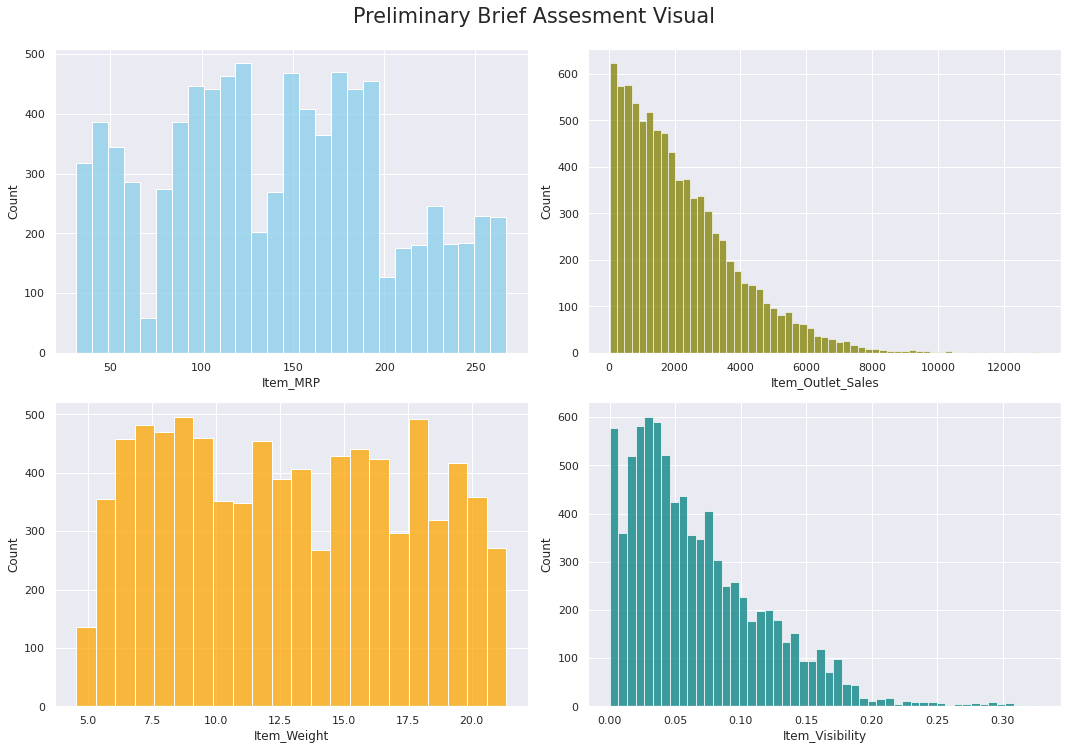

In [94]:
# Changing the histplot figure with to a 2x2 variation to allow up 4 variables to be input and displayed
fig, axs = plt.subplots(2, 2, figsize=(15,10))
sns.set_style("darkgrid")

sns.histplot(df_sales, bins = 'auto', color="skyblue", x = 'Item_MRP', ax=axs[0,0])
sns.histplot(df_sales, bins = 'auto', color="olive", x = 'Item_Outlet_Sales', ax=axs[0,1])
sns.histplot(df_sales, bins = 'auto', color="orange", x = 'Item_Weight', ax=axs[1,0])
sns.histplot(df_sales, bins = 'auto', color="teal", x = 'Item_Visibility', ax=axs[1,1])
fig.suptitle('Preliminary Brief Assesment Visual', y=1.04, size='xx-large')
fig.tight_layout();

I plotted my boxplots without specifying a column from the dataframe so that it defaults to diplaying all the numerical columns in my dataset and I can analyze them all at once insteand of individually

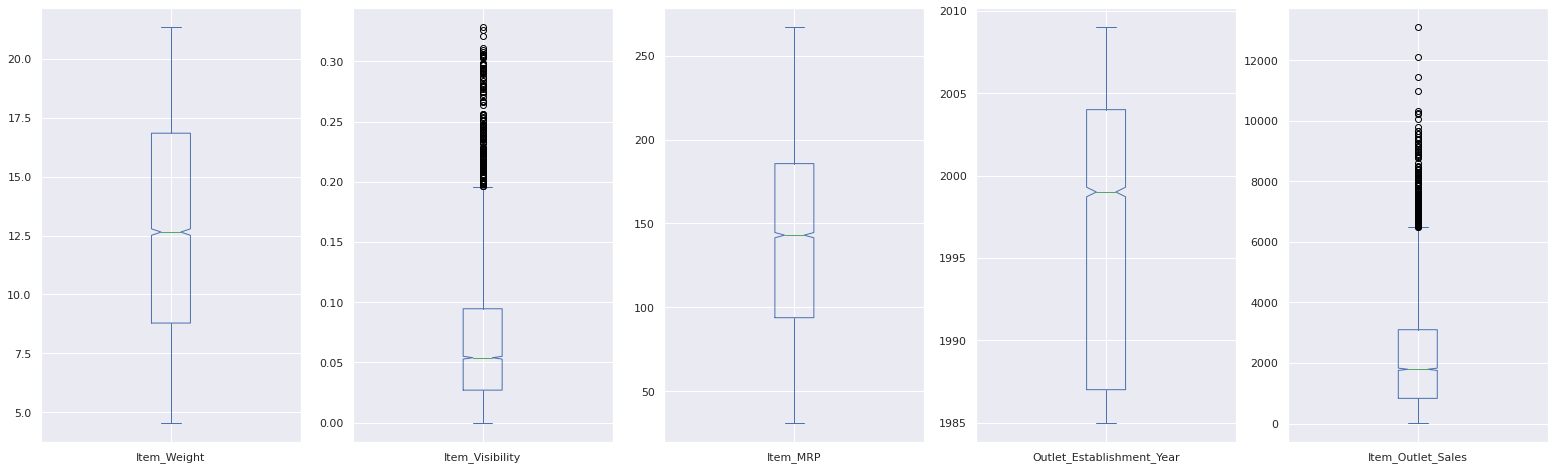

In [95]:
# Applying seaborn style 
sns.set()
# Increasing the size of the figure to separate the boplots to better view the displayed information
plt.rcParams['figure.figsize'] = (27,8)
df_sales.plot(kind = 'box', subplots = True, notch = True)
plt.title('');

A Histogram of the Item Outlet Sales grouped by Outlet Type suggests that Supermarket Type 1 has the largest distribution of sales

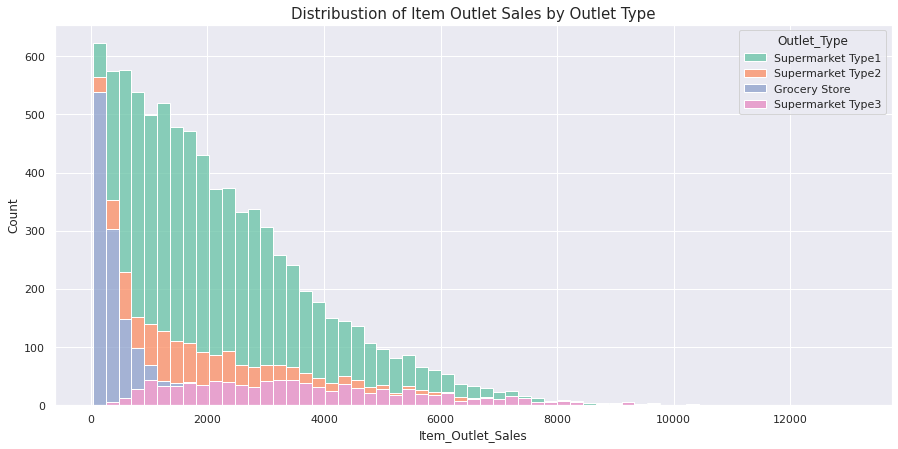

In [96]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(figsize=(15,7))
sns.histplot(df_sales, bins = 'auto', x = 'Item_Outlet_Sales', hue='Outlet_Type', multiple="stack", palette='Set2')
plt.title('Distribustion of Item Outlet Sales by Outlet Type', fontsize='15');

A heatmap of the dataset suggest that most of the numerical columns have almost no correlation except for a moderate correlation between item max retail price and item outlet sales 

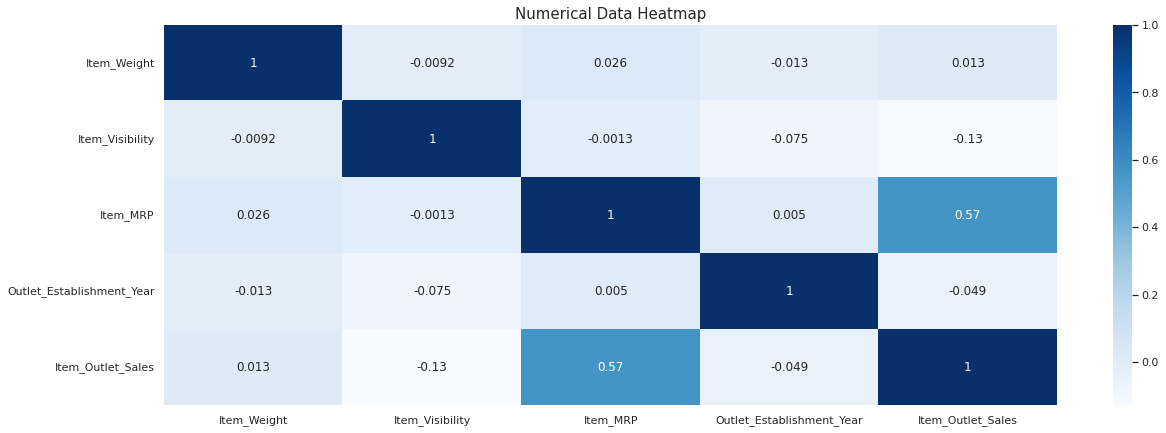

In [97]:
fig, axs = plt.subplots(figsize=(20,7))
out = df_sales.drop(columns='Outlet_Identifier').corr()  # Dropping the Outlet Identifier column because the heatmap wont read it
plt.xticks(rotation = 0)  # changing the xtixks to 0 degree rotation to eliminate uncccesary white space caused by the xticks being at a 90 degree by default
sns.heatmap(out, annot=True, cmap='Blues')
plt.title('Numerical Data Heatmap', fontsize='15');

Further analysis of the Item Outlet Sales and Item MRP(Max Retail Price). Upon first glance at a comparison on a scatterplot, it appears to have an obvious progression as sales totals increase with higher retail prices. But that does not necessarily mean that higher retail prices translate to larger profits. This is evidenced by the lack of density in the 4th cluster of data to the far right of the scatterplot below. While some items reached sales amounts above 10k, the majority of items with an MRP over 200 still didnt sell any better than items with an MRP between 175 and 200. In fact it stands to reason that it did not acrue quite as many sales as the 3rd cluster(2nd from the right), which has a much higher density, and even more so with the 2nd cluster. This suggests a higher amount of sales, which in turn suggests that affordability is more conducive to higher sales numbers than maximizing item price. 

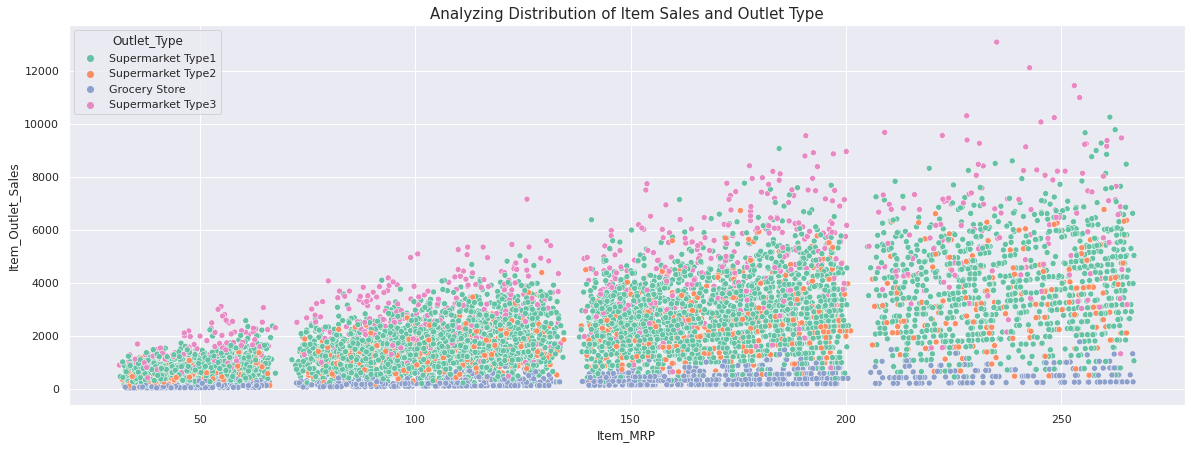

In [98]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(figsize=(20,7))
sns.scatterplot(data=df_sales, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', palette='Set2')
plt.title('Analyzing Distribution of Item Sales and Outlet Type', fontsize='15');

# Machine Learning Preparation

**Tasks:**

[X] Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

[X] Perform a train test split 

[X] Create a pre processing pipeline to prepare the dataset for Machine Learning

In [99]:
# Leading necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [100]:
# Reloading data for simplicity
path = '/content/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Inspecting Data and Addressing discrepancies

In [101]:
# Inspecting data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

The missing values in the Item Weight column will be filled in during pipeline processing. 

The Outlet Size column consists of Ordinal Data but it has missing values. To prep it for Machine Learning the values need to be Ordinal Encoded. Comparing the Outlet Sizes to Item Outlet Sales in the visuals below shows very close alignment between the data in the Missing category and the Small category. Since they are so closely aligned I will Ordinal Encode the Missing category to the same value as the Small category.  

In [102]:
# Filling in the missing values in Outlet Size for viewing purposes below
df['Outlet_Size'] = df[['Outlet_Size']].fillna("missing")

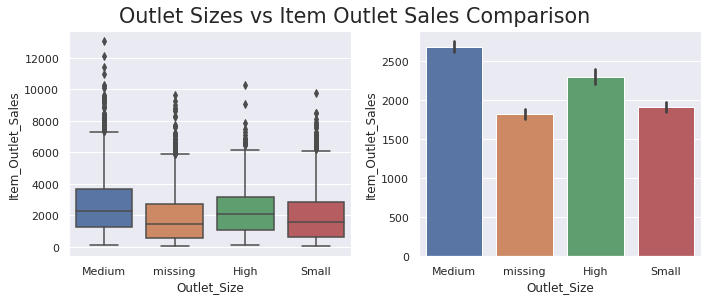

In [103]:
# Inspecting Outlet Size column
# I used code (with a slight edit) that James showed in a discord exchange about adressing this column. 
# I was going about it a different way but I believe this approach is the best way to justify how to deal with the missing values. I understand every line of code. 
fig, axes = plt.subplots(figsize=(10,4), ncols=2)
sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0])
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[1])
fig.suptitle('Outlet Sizes vs Item Outlet Sales Comparison', y=1.04, size='xx-large')
fig.tight_layout();

In [104]:
# Ordinal Encoding Outlet Size column and Confirming result
df['Outlet_Size'].replace({'missing':1, 'Small':1, 'Medium':2, 'High':3}, inplace=True)
df['Outlet_Size'].value_counts()

1    4798
2    2793
3     932
Name: Outlet_Size, dtype: int64

# Identifying feature matrix(X), target(y), and Executing a train test split

In [105]:
X = df.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# Initiating Pre Processing Pipeline to prepare the dataset for Machine Learning

In [106]:
# Instantiating column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [107]:
# Instantiating imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Instantiating column transformers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [108]:
# Creating numeric pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [109]:
cat_pipeline = make_pipeline(freq_imputer, ohe)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [110]:
# Tuples for the column tranformer
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)
# Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4fd4060f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4fd4060750>)])

In [111]:
# Fitting the column transformer onto the training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4fd4060f90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4fd4060750>)])

In [112]:
# Transforming training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [113]:
# Inspecting for missing values and confirming data is scaled and one-hot encoded. Code adapted from the course material
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 43)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])